# Assignment-Functional
Data: 2022/1/1<br>
Description: This assignment aim to figure out how to implement netural networks in functional methods using tensorflow.

## OverView

Before I start my assignment, I would like to answer the question why we need to use the Functional API.<br>
For Sequential API, it is appropriate for **a plain stack of layers** where each layer has **exactly one input tensor and one output tensor.**<br>
So, Sequential API is **not appropriate** when <br>
(1)Our model has multiple inputs or multiple outputs;<br>
(2)Any of our layers has multiple inputs or multiple outputs;<br>
(3)We need to do layer sharing;<br>
(4)We want non-linear topology (e.g. a residual connection, a multi-branch model)

It is because the Sequential API has so many limitations that we need to use the Functional API.<br>
The Functional API is a more flexible way of creating models and can **handle models with non-linear topologies**, **models with shared layers** and **models with multiple inputs or outputs**.<br>
In this jupter notebook, **I will complete two neural network structures using the Functional API.** The first is a relatively simple network structure, as we applied in the sequential API; the second is a more complex goolenet network structure. **These two network structures will be used to learn the Functional API and on this basis the similarities and differences between the two network structures will be compared.**<br>
there are content of this jupter notebook:<br>
**part1 Implementing simple network structure using the functional API**<br>
**part2 Implementing Googlenet structure using the functional API**<br>

## PART1 Implementing simple network structure using the functional API

**Step1: Importing datasets and some library**

In [1]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib
matplotlib.use("Agg")
import logging
logging.getLogger("tensorflow").setLevel(logging.CRITICAL)
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
import matplotlib.pyplot as plt
import numpy as np
import argparse
from PIL import Image
import matplotlib
# matplotlib.use('TkAgg')
from matplotlib import pyplot as pl
import seaborn as sns 

In [2]:
# We will Normalise the dataset to scale it between 0 and 1, which is an optional task
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

In [3]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(28, 28, 1)) # width, height, channel

In [6]:
img_inputs.shape

TensorShape([None, 28, 28, 1])

In [7]:
img_inputs.dtype

tf.float32

**Step2: Constructing the model**

In [8]:
def my_net_functional(inputs):
	# initialize the model along with the input shape to be
	# "channels last" ordering
	flat_layer = layers.Flatten()
	x = flat_layer(inputs) # Flattens the input. Does not affect the batch size.
	# First Hidden Layer
	x = layers.Dense(128, activation=tf.nn.relu)(x)
	# Second Hidden Layer
	x = layers.Dense(128, activation=tf.nn.relu)(x)
	# Output Layer
	outputs = layers.Dense(10, activation=tf.nn.softmax)(x)
	model = keras.Model(inputs, outputs, name="my_model_functional")
	return model

In [9]:
# instantiate a Keras Functional model
print("[INFO] using functional model...")
my_model_functional = my_net_functional(inputs=img_inputs)

[INFO] using functional model...


In [10]:
# !pip install pydot
# !pip install graphviz

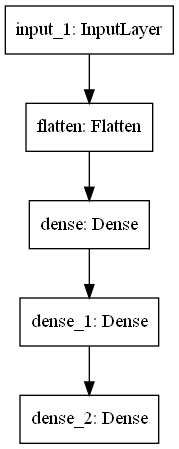

In [11]:
#teacher, if you can't run this code, you should first pip install pydot` and install graphviz
import os
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
# Then install graohviz software
keras.utils.plot_model(my_model_functional, "my_first_functional_model.png")

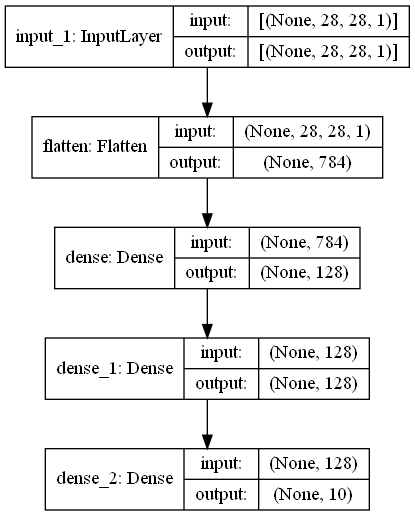

In [12]:
keras.utils.plot_model(my_model_functional, "my_first_functional_model_with_shape_info.png", show_shapes=True)

**Step3: Model training**

In [13]:
# initialize the initial learning rate, batch size, and number of
# epochs to train for
INIT_LR = 0.1
BATCH_SIZE = 100
NUM_EPOCHS = 10

# initialize the optimizer and compile the model
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
print("[INFO] training network...")
my_model_functional.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the network
H = my_model_functional.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8714 - val_loss: 0.1533 - val_accuracy: 0.9529
Epoch 2/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.1352 - accuracy: 0.9591 - val_loss: 0.1330 - val_accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.1153 - accuracy: 0.9661 - val_loss: 0.1255 - val_accuracy: 0.9615
Epoch 4/10
1875/1875 [==============================] - 2s 969us/step - loss: 0.1062 - accuracy: 0.9685 - val_loss: 0.1211 - val_accuracy: 0.9626
Epoch 5/10
1875/1875 [==============================] - 2s 965us/step - loss: 0.0995 - accuracy: 0.9712 - val_loss: 0.1195 - val_accuracy: 0.9634
Epoch 6/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.0968 - accuracy: 0.9716 - val_loss: 0.1164 - val_accuracy: 0.9642
Epoch 7/10
1875/1875 [==============================] - 2s 969us/step - loss: 0.0891 - accuracy: 0.

In [14]:
my_model_functional.summary()

Model: "my_model_functional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


**Step4: Model evaluation**

In [15]:
# Calculate Validation Loss and Validation Accuracy and compare with above one
print("[INFO] evaluating network...")
val_loss_01, val_acc_01 = my_model_functional.evaluate(test_images, test_labels)
print(val_loss_01, val_acc_01)

[INFO] evaluating network...
313/313 [==============================] - 0s 568us/step - loss: 0.1106 - accuracy: 0.9667
0.11060385406017303 0.96670001745224


In [16]:
# evaluate the network
labelNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions = my_model_functional.predict(test_images, batch_size=BATCH_SIZE)
print(classification_report(test_labels.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



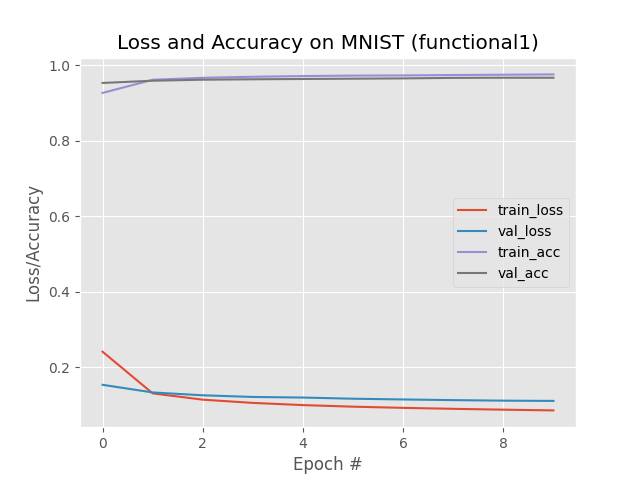

In [17]:
N = np.arange(0, NUM_EPOCHS)
title = "Loss and Accuracy on MNIST (functional1)"
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("my_model_functional_plot.png")
display(Image.open("my_model_functional_plot.png"))

In [18]:
# Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(list(test_labels.argmax(axis=1)), list(predictions.argmax(axis=1)))
print(confusion_matrix) 

[[ 966    0    0    1    0    2    4    1    5    1]
 [   0 1118    4    0    0    1    3    1    8    0]
 [   7    1  991    6    5    0    3    8   11    0]
 [   1    0    9  975    0    6    0    5   12    2]
 [   2    0    3    0  954    0    8    3    3    9]
 [   3    0    1   18    1  848    6    0   10    5]
 [   8    2    4    1    7    3  929    0    4    0]
 [   3    5   14    3    1    0    0  995    2    5]
 [   3    1    3    8    6    2    5    5  939    2]
 [   7    6    1    7   17    2    0    8    9  952]]


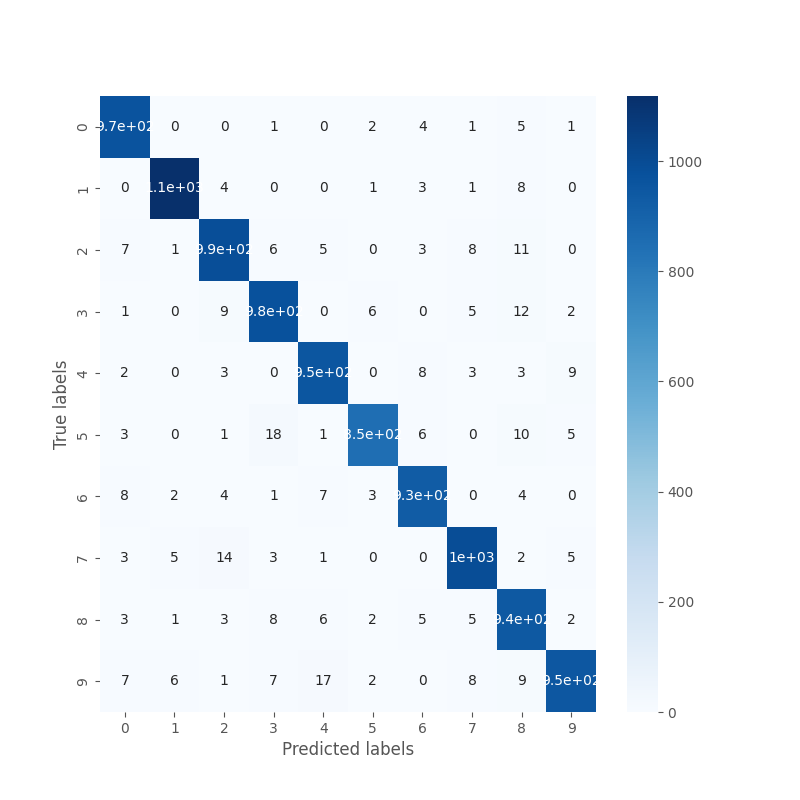

In [19]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

plt.ylim(10, 0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("confusion_matrix_1.png")
display(Image.open("confusion_matrix_1.png"))

**Step5: Save Our Model**

In [20]:
# Save this DL Model for the future use
my_model_functional.save('functional.model1')

In [21]:
# Load the previously saved DL Model for Prediction
num_model_01 = tf.keras.models.load_model('functional.model1')

In [22]:
# Make Predictions using the loaded DL Model
predictions = num_model_01.predict(test_images)

In [23]:
# Display the Pridictions - Probability Distributions
print(predictions)

[[5.96052246e-07 5.69383246e-07 7.33118359e-05 ... 9.99656439e-01
  4.40157805e-07 8.28960401e-06]
 [3.01287787e-06 1.39091443e-03 9.97577965e-01 ... 5.23367021e-07
  2.76267310e-05 2.95327823e-07]
 [1.44334663e-07 9.99374449e-01 7.08928783e-05 ... 7.36506699e-05
  2.82071065e-04 4.21228424e-06]
 ...
 [7.86597187e-09 2.62402970e-08 4.65887950e-07 ... 2.61640962e-05
  1.79131694e-05 3.89970897e-04]
 [9.12839187e-06 2.91006600e-05 7.21748847e-08 ... 3.14595837e-07
  1.59284286e-03 3.04484206e-06]
 [1.46733055e-05 4.26601730e-07 2.43226423e-05 ... 1.62154254e-08
  5.76063712e-07 2.63569557e-08]]


## PART2 Implementing Googlenet structure using the functional API

Next I will give a more difficult network structure, Googlenet.<br>
The Functional API makes it easy to deal with **non-linear connection topologies** (where the layers of these models are not connected sequentially), and in the Googlenet structure you will see the significant benefits.

**Step1: Constructing the model**

In [24]:
def my_googlenet_functional(width, height, depth, classes):
	def conv_module(x, K, kX, kY, stride, chanDim, padding="same"):
		# define a CONV => BN => RELU pattern
		x = Conv2D(K, (kX, kY), strides=stride, padding=padding)(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = Activation("relu")(x)
		# return the block
		return x
	def inception_module(x, numK1x1, numK3x3, chanDim):
		# define two CONV modules, then concatenate across the
		# channel dimension
		conv_1x1 = conv_module(x, numK1x1, 1, 1, (1, 1), chanDim)
		conv_3x3 = conv_module(x, numK3x3, 3, 3, (1, 1), chanDim)
		x = concatenate([conv_1x1, conv_3x3], axis=chanDim)
		# return the block
		return x
	def downsample_module(x, K, chanDim):
		# define the CONV module and POOL, then concatenate
		# across the channel dimensions
		conv_3x3 = conv_module(x, K, 3, 3, (2, 2), chanDim,
			padding="valid")
		pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
		x = concatenate([conv_3x3, pool], axis=chanDim)
		# return the block
		return x
	# initialize the input shape to be "channels last" and the
	# channels dimension itself
	inputShape = (height, width, depth)
	chanDim = -1
	# define the model input and first CONV module
	inputs = Input(shape=inputShape)
	x = conv_module(inputs, 84, 3, 3, (1, 1), chanDim)
	# two Inception modules followed by a downsample module
	x = inception_module(x, 28, 28, chanDim)
	x = inception_module(x, 28, 42, chanDim)
	x = downsample_module(x, 70, chanDim)
	# four Inception modules followed by a downsample module
	x = inception_module(x, 98, 42, chanDim)
	x = inception_module(x, 84, 56, chanDim)
	x = inception_module(x, 70, 70, chanDim)
	x = inception_module(x, 42, 84, chanDim)
	x = downsample_module(x, 84, chanDim)
	# two Inception modules followed by global POOL and dropout
	x = inception_module(x, 154, 140, chanDim)
	x = inception_module(x, 154, 140, chanDim)
	x = AveragePooling2D((6, 6))(x)
	x = Dropout(0.5)(x)
	# softmax classifier
	x = Flatten()(x)
	x = Dense(classes)(x)
	x = Activation("softmax")(x)
	# create the model
	model = Model(inputs, x, name="minigooglenet")
	# return the constructed network architecture
	return model

In [25]:
# instantiate a Keras Functional model
print("[INFO] using googlenet_functional model...")
my_googlenet_functional = my_googlenet_functional(28,28,1,10)

[INFO] using googlenet_functional model...


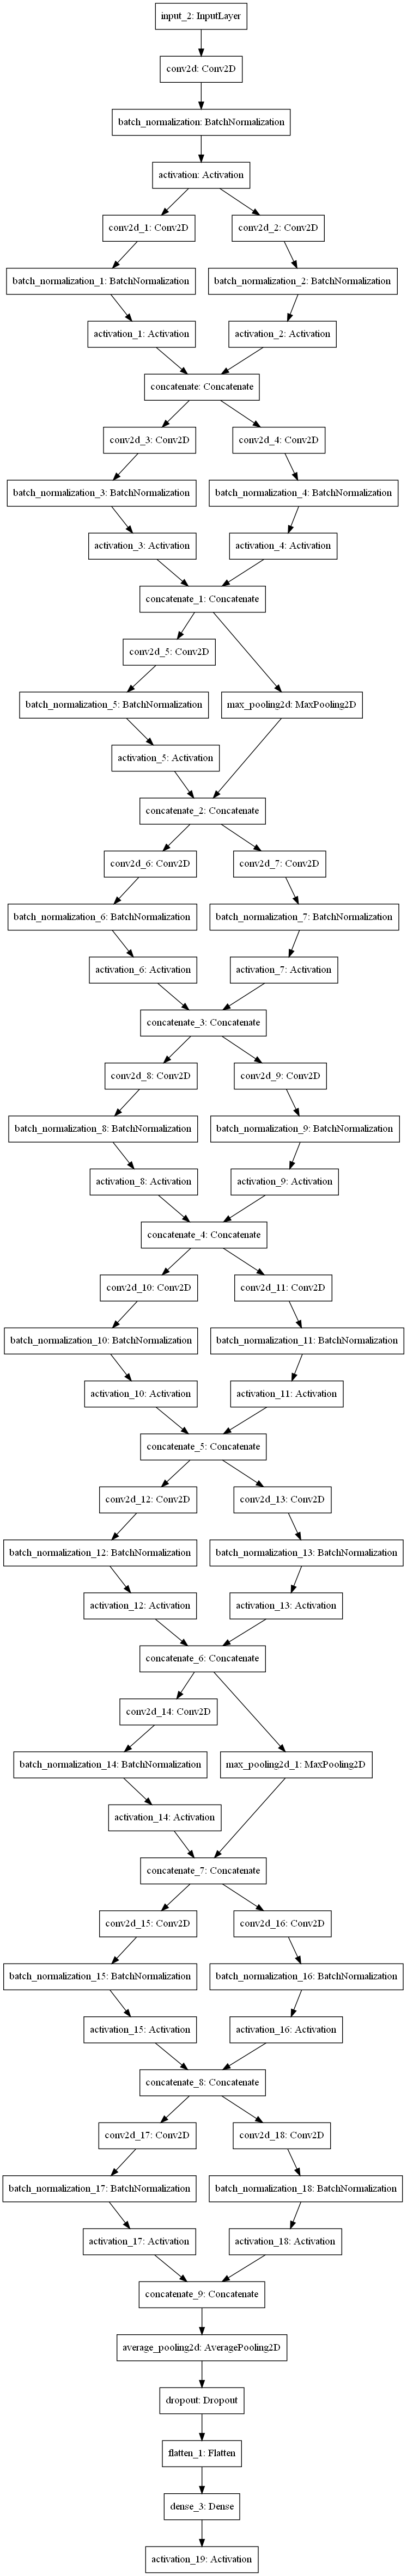

In [26]:
#teacher, if you can't run this code, you should first pip install pydot` and install graphviz
import os
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
# Then install graohviz software
keras.utils.plot_model(my_googlenet_functional, "my_googlenet_functional_model.png")

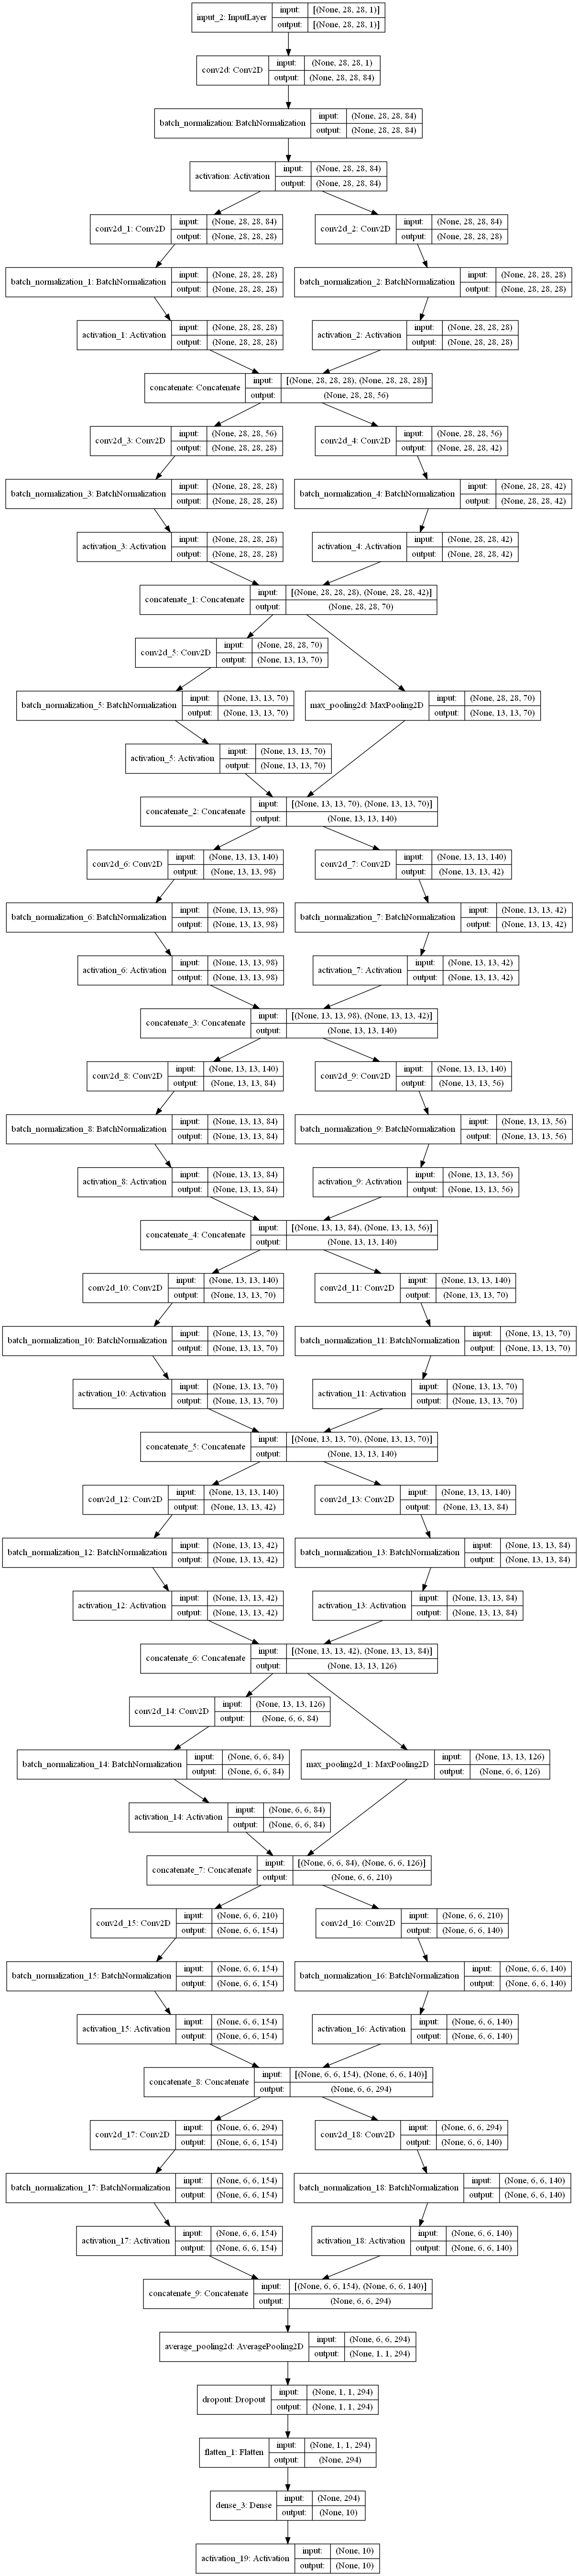

In [27]:
keras.utils.plot_model(my_googlenet_functional, "my_googlenet_functional_model_with_shape_info.png", show_shapes=True)

In [28]:
my_googlenet_functional.summary()

Model: "minigooglenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 84)   840         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 84)   336         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 84)   0           batch_normalization[0][0]        
______________________________________________________________________________________

**Step2: Model training**

In [29]:
# initialize the initial learning rate, batch size, and number of
# epochs to train for
INIT_LR = 0.1
BATCH_SIZE = 100
NUM_EPOCHS = 10

# initialize the optimizer and compile the model
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
print("[INFO] training network...")
my_googlenet_functional.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the network
G = my_googlenet_functional.fit(train_images, train_labels, epochs=NUM_EPOCHS, validation_data=(test_images, test_labels))

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 1054s 561ms/step - loss: 0.2772 - accuracy: 0.9114 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 2/10
1875/1875 [==============================] - 982s 524ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0212 - val_accuracy: 0.9928
Epoch 3/10
1875/1875 [==============================] - 1014s 541ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0219 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 1014s 541ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0205 - val_accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 960s 512ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0198 - val_accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 1046s 558ms/step - loss: 0.0283 - accuracy: 0.9919 - val_loss: 0.0182 - val_accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 1038s 554ms/step - loss: 

**Step3: Model evaluation**

In [30]:
# Calculate Validation Loss and Validation Accuracy and compare with above one
print("[INFO] evaluating network...")
val_loss_02, val_acc_02 = my_googlenet_functional.evaluate(test_images, test_labels)
print(val_loss_02, val_acc_02)

[INFO] evaluating network...
313/313 [==============================] - 27s 87ms/step - loss: 0.0179 - accuracy: 0.9942
0.017932768911123276 0.9941999912261963


In [31]:
# evaluate the network
labelNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions2 = my_googlenet_functional.predict(test_images, batch_size=BATCH_SIZE)
print(classification_report(test_labels.argmax(axis=1),
	predictions2.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



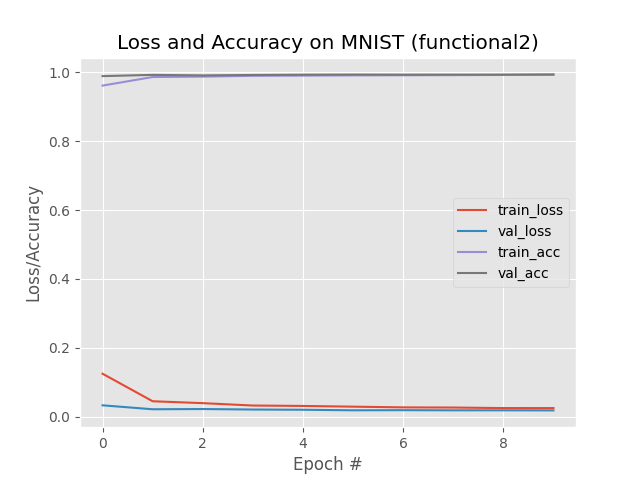

In [32]:
N = np.arange(0, NUM_EPOCHS)
title = "Loss and Accuracy on MNIST (functional2)"
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(N, G.history["loss"], label="train_loss")
plt.plot(N, G.history["val_loss"], label="val_loss")
plt.plot(N, G.history["accuracy"], label="train_acc")
plt.plot(N, G.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("my_googlenet_functional_plot.png")
display(Image.open("my_googlenet_functional_plot.png"))

In [33]:
# Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(test_labels.argmax(axis=1),predictions2.argmax(axis=1))
print(confusion_matrix2) 

[[ 978    0    0    0    0    1    1    0    0    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   2    0 1026    1    0    0    0    3    0    0]
 [   0    0    0 1007    0    2    0    0    0    1]
 [   0    0    0    0  979    0    0    1    0    2]
 [   0    0    0    8    0  881    1    1    0    1]
 [   1    4    0    0    0    2  949    0    2    0]
 [   0    2    3    1    0    0    0 1021    0    1]
 [   0    0    2    1    0    1    0    0  968    2]
 [   0    1    0    0    4    1    0    1    1 1001]]


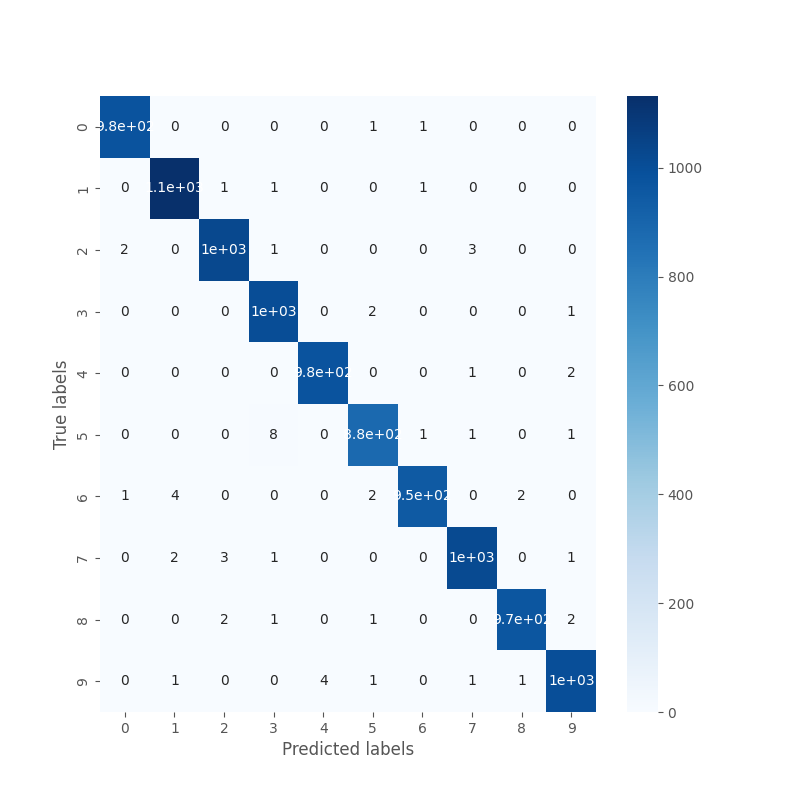

In [34]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix2, annot=True, cmap='Blues')

plt.ylim(10, 0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("confusion_matrix_2.png")
display(Image.open("confusion_matrix_2.png"))

**Step4: Save Our Model**

In [35]:
# Save this DL Model for the future use
my_googlenet_functional.save('functional.model2')

In [36]:
# Load the previously saved DL Model for Prediction
num_model_02 = tf.keras.models.load_model('functional.model2')

In [37]:
# Make Predictions using the loaded DL Model
predictions2 = num_model_02.predict(test_images)

In [38]:
# Display the Pridictions - Probability Distributions
print(predictions2)
print(predictions2.argmax(axis=1))
print(test_labels.argmax(axis=1))

[[2.0027181e-07 2.5324230e-06 3.2207861e-06 ... 9.9998796e-01
  3.4822207e-08 3.3147037e-06]
 [4.8291217e-06 4.4071901e-05 9.9968791e-01 ... 6.9594016e-06
  2.4806418e-06 1.8408099e-07]
 [7.2348062e-06 9.9992561e-01 1.7063488e-06 ... 1.9487479e-05
  6.6807470e-06 2.1691888e-07]
 ...
 [2.6942734e-10 1.0049975e-07 2.1294897e-09 ... 6.0061899e-07
  1.9661652e-08 3.5394842e-07]
 [8.0076143e-07 2.2652165e-08 9.5428490e-08 ... 3.1461218e-09
  1.5341766e-05 1.3724454e-07]
 [4.9512892e-05 8.6469736e-06 1.7328295e-03 ... 6.5703638e-08
  1.6246299e-04 1.8201996e-05]]
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


## Summary

In this assignment on the Functional API, I first reviewed the shortcomings of the network model structure we designed in the Sequential API, and then **presented the reasons why we needed to use the Functional API**. to represent the features of the Functional API more visually, **I wrote two more network structure models** from, respectively, simple By comparing the two network structure models, I found that the **accuracy of both network models was higher**, probably due to the simplicity of the mnist dataset and the efficiency of the neural network algorithm. I also found that **Googelent consisted of three components, downsample, conv and inception, which took longer to train due to the complexity of the network structure.** Finally, I evaluate and save the model parameters for the training models of both neural networks.